In [ ]:
!pip install scikit-learn pandas numpy matplotlib tensorflow

## Import Libraries and Understand the Data

In [24]:
%%capture
%pip install pandas
%pip install numpy
%pip install matplotlib

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.dates as mdates
from matplotlib.patches import Patch

### 📊 Macroeconomic Variables

1. **sasdate** – Date of observation; used to align macroeconomic conditions with wheat futures prices.

2. **RPI** – Real personal income; when people earn more, food consumption is stable or higher, supporting wheat demand.

3. **W875RX1** – Real income excluding government transfers; shows true wage-driven purchasing power for food.

4. **DPCERA3M086SBEA** – Real consumer spending; higher spending means stronger demand for staple foods like wheat.

5. **CMRMTSPLx** – Inflation-adjusted manufacturing and trade sales; rising sales indicate a strong demand environment for commodities.

6. **RETAILx** – Real retail sales; higher retail activity reflects stronger food purchases.

7. **INDPRO** – Total industrial output; a growing economy consumes more raw materials and food inputs.

8. **IPFPNSS** – Output of final products; higher production means more downstream food demand.

9. **IPFINAL** – Final-stage industrial production; signals overall economic demand strength.

10. **IPCONGD** – Consumer goods production; higher output reflects rising household consumption.

11. **IPDCONGD** – Durable goods production; expansion phase of the business cycle.

12. **IPNCONGD** – Nondurable goods production; closely linked to food and agricultural processing.

13. **IPBUSEQ** – Business equipment output; firms investing more signals economic expansion.

14. **IPMAT** – Materials production; higher activity raises costs for packaging, storage, and transport.

15. **IPDMAT** – Durable materials output; strong construction and manufacturing raise input demand.

16. **IPNMAT** – Nondurable materials output; includes food-related inputs like packaging materials.

17. **IPMANSICS** – Manufacturing output; stronger manufacturing increases energy and logistics demand.

18. **IPB51222S** – Consumer energy production; energy costs directly affect fertilizer and transport.

19. **IPFUELS** – Fuel production; fuel availability influences farming and shipping costs.

20. **CUMFNS** – Capacity utilization; when factories run near full capacity, input prices rise.

21. **HWI** – Help-wanted index; high labor demand supports income and food consumption.

22. **HWIURATIO** – Ratio of job openings to unemployed workers; tight labor markets increase wages and food demand.

23. **CLF16OV** – Labor force participation rate; more people working supports consumption.

24. **CE16OV** – Civilian employment level; broader employment means stable food demand.

25. **UNRATE** – Unemployment rate; higher unemployment weakens consumer spending.

26. **UEMPMEAN** – Average unemployment duration; long job searches reduce household food spending flexibility.

27. **UEMPLT5** – Short-term unemployment; rising values signal early economic slowdown.

28. **UEMP5TO14** – Medium-term unemployment; reflects softening labor demand.

29. **UEMP15OV** – Long-term unemployment; persistent weakness suppresses consumption.

30. **UEMP15T26** – Unemployment lasting 15–26 weeks; stress phase in labor markets.

31. **UEMP27OV** – Unemployment over 27 weeks; deep economic weakness affecting demand.

32. **CLAIMSx** – New unemployment claims; rising claims warn of slowing demand.

33. **PAYEMS** – Total nonfarm employment; more jobs support food consumption.

34. **USGOOD** – Employment in goods-producing sectors; industrial strength indicator.

35. **CES1021000001** – Mining employment; energy-sector activity affecting fuel costs.

36. **USCONS** – Construction employment; economic expansion indicator.

37. **MANEMP** – Manufacturing employment; strong manufacturing increases energy and transport demand.

38. **DMANEMP** – Durable manufacturing employment; business investment cycle signal.

39. **NDMANEMP** – Nondurable manufacturing employment; includes food and beverage processing.

40. **SRVPRD** – Service-sector employment; household income stability indicator.

41. **USTPU** – Transportation and utilities employment; higher levels raise logistics demand.

42. **USWTRADE** – Wholesale trade employment; distribution demand for food products.

43. **USTRADE** – Retail trade employment; consumer-facing demand signal.

44. **USFIRE** – Finance and real estate employment; credit availability indicator.

45. **USGOVT** – Government employment; fiscal stability supports baseline demand.

46. **CES0600000007** – Goods-producing employment level; overall industrial activity measure.

47. **AWOTMAN** – Manufacturing overtime hours; firms stretching capacity signal rising demand.

48. **AWHMAN** – Manufacturing hours worked; sustained hours mean strong output.

49. **HOUST** – Housing starts; leading indicator of economic cycles.

50. **HOUSTNE** – Northeast housing starts; regional demand conditions.

51. **HOUSTMW** – Midwest housing starts; regional economic health in key wheat areas.

52. **HOUSTS** – Southern housing starts; construction-driven demand indicator.

53. **HOUSTW** – Western housing starts; regional growth signal.

54. **PERMIT** – Building permits; future construction activity indicator.

55. **PERMITNE** – Northeast permits; regional expansion expectations.

56. **PERMITMW** – Midwest permits; logistics and housing demand proxy.

57. **PERMITS** – Southern permits; construction outlook.

58. **PERMITW** – Western permits; forward-looking growth signal.

59. **ACOGNO** – New consumer goods orders; rising orders signal future production and demand.

60. **AMDMNOx** – New orders for durable materials; increased industrial activity raises input demand and costs.

61. **ANDENOx** – New orders for nondurable goods; stronger food and packaging demand.

62. **AMDMUOx** – Unfilled durable goods orders; supply bottlenecks that raise costs.

63. **BUSINVx** – Business inventories; high inventories suggest oversupply and price pressure.

64. **ISRATIOx** – Inventory-to-sales ratio; high ratios mean weak demand relative to supply.

65. **M1SL** – Narrow money supply; more cash in the system increases speculative activity in commodity futures.

66. **M2SL** – Broad money supply; higher liquidity supports commodity prices including wheat.

67. **M2REAL** – Inflation-adjusted money supply; real liquidity conditions affecting futures demand.

68. **BOGMBASE** – Monetary base; central bank expansion boosts asset prices including commodities.

69. **TOTRESNS** – Total bank reserves; high reserves ease credit conditions for producers and traders.

70. **NONBORRES** – Nonborrowed reserves; indicates organic liquidity rather than emergency support.

71. **BUSLOANS** – Business loans; easier credit supports agribusiness investment and storage.

72. **REALLN** – Real loans; inflation-adjusted borrowing capacity for firms.

73. **NONREVSL** – Nonrevolving consumer credit; supports steady household consumption of food.

74. **CONSPI** – Consumption of services price index; inflation spillovers into food prices.

75. **S&P 500** – Equity market level; risk-on environments attract capital into commodities.

76. **S&P div yield** – Dividend yield; higher yield often signals defensive markets and weaker commodity flows.

77. **S&P PE ratio** – Equity valuation measure; high valuations can redirect funds into real assets like wheat.

78. **FEDFUNDS** – Federal funds rate; higher rates raise storage and financing costs for wheat.

79. **CP3Mx** – 3-month commercial paper rate; short-term corporate financing conditions.

80. **TB3MS** – 3-month Treasury bill rate; baseline short-term risk-free rate.

81. **TB6MS** – 6-month Treasury bill rate; near-term interest rate expectations.

82. **GS1** – 1-year Treasury yield; short-term monetary policy outlook.

83. **GS5** – 5-year Treasury yield; medium-term rate expectations affecting investment flows.

84. **GS10** – 10-year Treasury yield; long-term capital allocation signal.

85. **AAA** – High-grade corporate bond yield; overall financial conditions.

86. **BAA** – Lower-grade corporate yield; credit stress indicator impacting risk appetite.

87. **COMPAPFFx** – Commercial paper spread; financial stress reduces speculative commodity positions.

88. **TB3SMFFM** – T-bill minus Fed funds spread; short-term liquidity stress signal.

89. **TB6SMFFM** – 6-month bill minus Fed funds spread; funding pressure indicator.

90. **T1YFFM** – 1-year Treasury minus Fed funds; rate expectations channel.

91. **T5YFFM** – 5-year Treasury minus Fed funds; medium-term policy stance.

92. **T10YFFM** – 10-year Treasury minus Fed funds; long-run rate expectations.

93. **AAAFFM** – AAA yield minus Fed funds; credit market tightness indicator.

94. **BAAFFM** – BAA yield minus Fed funds; risk premium affecting futures flows.

95. **TWEXAFEGSMTHx** – Broad trade-weighted dollar index; stronger dollar hurts US wheat exports.

96. **EXSZUSx** – USD exchange rate vs major currencies; global competitiveness indicator.

97. **EXJPUSx** – USD/JPY exchange rate; global trade and risk sentiment proxy.

98. **EXUSUKx** – USD/GBP exchange rate; export pricing competitiveness.

99. **EXCAUSx** – USD/CAD exchange rate; North American trade flows.

100. **WPSFD49207** – Finished goods PPI; inflation passed to food prices.

101. **WPSFD49502** – Intermediate goods PPI; cost pressures before final pricing.

102. **WPSID61** – Industrial commodity prices; broad input cost signal.

103. **WPSID62** – Crude materials prices; raw input costs including agricultural inputs.

104. **OILPRICEx** – Crude oil price; fertilizer, fuel, and transport costs for wheat.

105. **PPICMM** – PPI for crude materials; early-stage inflation signal.

106. **CPIAUCSL** – Headline CPI; food inflation expectations.

107. **CPIAPPSL** – Apparel CPI; discretionary inflation benchmark.

108. **CPITRNSL** – Transportation CPI; shipping cost pressure for grains.

109. **CPIMEDSL** – Medical CPI; overall inflation persistence indicator.

110. **CUSR0000SAC** – CPI for commodities; goods inflation affecting staples.

111. **CUSR0000SAD** – CPI durables; business cycle inflation signal.

112. **CUSR0000SAS** – CPI services; demand-side inflation pressure.

113. **CPIULFSL** – CPI excluding food and energy; core inflation benchmark.

114. **CUSR0000SA0L2** – CPI less shelter; consumption-driven inflation.

115. **CUSR0000SA0L5** – CPI less medical care; discretionary inflation signal.

116. **PCEPI** – Personal consumption expenditure price index; Fed-preferred inflation measure.

117. **DDURRG3M086SBEA** – Real durable goods consumption; investment cycle indicator.

118. **DNDGRG3M086SBEA** – Real nondurable goods consumption; food demand proxy.

119. **DSERRG3M086SBEA** – Real services consumption; overall economic strength.

120. **CES0600000008** – Goods-producing hourly earnings; labor cost inflation.

121. **CES2000000008** – Construction hourly earnings; cost pressure spillovers.

122. **CES3000000008** – Manufacturing hourly earnings; processing and logistics costs.

123. **UMCSENTx** – Consumer sentiment; confidence-driven food demand.

124. **DTCOLNVHFNM** – Nonfinancial business credit; production and storage financing.

125. **DTCTHFNM** – Household credit; consumption support for staples.

126. **INVEST** – Real private investment; economic growth expectations.

127. **VIXCLSx** – Market volatility index; high volatility triggers risk-off selling in futures.



# Data Preprocessing

## Load and Clean FRED-MD and Wheat Futures Data

### Load the FRED-MD Macroeconomic Dataset

In [26]:
macro_df = pd.read_csv("data/FRED_MD.csv")
macro_df.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,Transform:,5.000,5.0,5.000,5.0000,5.00000,5.0000,5.0000,5.0000,5.0000,...,6.000,6.000,6.00,6.00,6.00,2.0,6.0,6.0,6.0000,1.0
1,1/1/1959,2583.560,2426.0,15.188,276676.8154,17689.23968,21.9998,23.6312,22.5507,32.1377,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
2,2/1/1959,2593.596,2434.8,15.346,278713.9773,17819.01912,22.4306,23.9501,22.7461,32.3734,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
3,3/1/1959,2610.396,2452.7,15.491,277775.2539,17967.91336,22.7538,24.0951,22.8577,32.3734,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
4,4/1/1959,2627.446,2470.0,15.435,283362.7075,17978.97983,23.2384,24.4431,23.1926,32.8841,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN


### Clean FRED-MD Dates and Remove Metadata Rows

In [27]:
macro_df["sasdate"] = pd.to_datetime(macro_df["sasdate"], errors="coerce")
macro_df = macro_df.dropna(subset=["sasdate"])
macro_df = macro_df.set_index("sasdate").sort_index()
macro_df.head()

/var/folders/0l/1ppqpvg53sxd4dc_2y_x3h300000gn/T/ipykernel_9355/2543654388.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  macro_df["sasdate"] = pd.to_datetime(macro_df["sasdate"], errors="coerce")


,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1959-01-01,2583.560,2426.0,15.188,276676.8154,17689.23968,21.9998,23.6312,22.5507,32.1377,19.7514,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
1959-02-01,2593.596,2434.8,15.346,278713.9773,17819.01912,22.4306,23.9501,22.7461,32.3734,19.8551,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
1959-03-01,2610.396,2452.7,15.491,277775.2539,17967.91336,22.7538,24.0951,22.8577,32.3734,20.2439,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
1959-04-01,2627.446,2470.0,15.435,283362.7075,17978.97983,23.2384,24.4431,23.1926,32.8841,20.3735,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN
1959-05-01,2642.720,2486.4,15.622,285307.2201,18119.82573,23.5885,24.6460,23.4159,33.0413,20.7882,...,18.280,10.238,2.17,2.48,2.08,95.3,6753.0,12646.0,80.7315,NaN


### Load the Wheat Futures Dataset

In [28]:
wheat_train = pd.read_csv("data/wheat_prices_train.csv")
wheat_val = pd.read_csv("data/wheat_prices_val.csv")
wheat_test = pd.read_csv("data/wheat_prices_test.csv")
wheat_train.shape, wheat_val.shape, wheat_test.shape

((4066, 7), (2555, 7), (255, 7))

### Calculate Log Returns

In [29]:
for df in [wheat_train, wheat_val, wheat_test]:
    df["Price"] = (
        df["Price"]
        .astype(str)
        .str.replace(",", "")
    )
    df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
    df["LogReturn"] = np.log(df["Price"]).diff()

wheat_train["LogReturn"] = np.log(wheat_train["Price"]).diff()
wheat_val["LogReturn"] = np.log(wheat_val["Price"]).diff()
wheat_test["LogReturn"] = np.log(wheat_test["Price"]).diff()

wheat_train = wheat_train.set_index("Date").sort_index()
wheat_val = wheat_val.set_index("Date").sort_index()
wheat_test = wheat_test.set_index("Date").sort_index()

wheat_train.head()

,Price,Open,High,Low,Vol.,Change %,LogReturn
Date,,,,,,,
01/01/2000,256.25,249.00,269.00,241.00,345.62K,3.12%,0.034743
01/01/2001,273.00,278.50,294.50,268.00,410.55K,-2.33%,-0.011834
01/01/2002,286.00,290.50,313.25,283.50,438.19K,-1.04%,-0.020762
01/01/2003,320.50,325.75,339.00,307.50,296.18K,-1.38%,-0.025415
01/01/2004,389.00,377.50,407.00,373.00,469.00K,3.18%,-0.042158


## Resampling

Macroeconomic data does not lose relevance instantly after release.  
Instead, its influence **decays gradually over time**.

So, we use **decay-weighted resampling**, where macroeconomic signals fade smoothly rather than changing abruptly.



### Resample Macro Data to Daily Frequency

In [30]:
macro_daily = macro_df.resample("D").ffill()
macro_daily.shape

(24412, 126)

### Detect Release Events Per Column

In [31]:
release_mask = macro_daily.ne(macro_daily.shift(1))
release_mask.head()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1959-01-01,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1959-01-02,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1959-01-03,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1959-01-04,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1959-01-05,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True


### Compute Days Since Last Release

In [32]:
days_since_release = release_mask.cumsum()
days_since_release = days_since_release.apply(lambda x: x.groupby(x).cumcount())
days_since_release.head()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1959-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1959-01-02,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,0
1959-01-03,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,0,2,2,2,0
1959-01-04,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,0,3,3,3,0
1959-01-05,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,0,4,4,4,0


### Apply Decay-Weighted Forward Fill

In [33]:
decay_rate = 0.02
decay_factors = np.exp(-decay_rate * days_since_release)
macro_decay = macro_daily * decay_factors
macro_decay.head()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1959-01-01,2583.560000,2426.000000,15.188000,276676.815400,17689.239680,21.999800,23.631200,22.550700,32.137700,19.751400,...,18.294000,10.152000,2.130000,2.450000,2.040000,NaN,6476.000000,12298.000000,84.204300,NaN
1959-01-02,2532.402084,2377.961981,14.887257,271198.247390,17338.969266,21.564175,23.163271,22.104166,31.501331,19.360296,...,17.931755,9.950977,2.087823,2.401487,1.999605,NaN,6347.766608,12054.483284,82.536943,NaN
1959-01-03,2482.257163,2330.875179,14.592470,265828.162295,16995.634671,21.137176,22.704607,21.666474,30.877563,18.976937,...,17.576682,9.753934,2.046482,2.353934,1.960010,NaN,6222.072408,11815.788523,80.902602,NaN
1959-01-04,2433.105178,2284.720758,14.303520,260564.412009,16659.098557,20.718631,22.255026,21.237449,30.266146,18.601168,...,17.228640,9.560794,2.005958,2.307323,1.921200,NaN,6098.867119,11581.820234,79.300623,NaN
1959-01-05,2384.926468,2239.480256,14.020291,255404.890962,16329.226304,20.308375,21.814347,20.816920,29.666836,18.232840,...,16.887490,9.371477,1.966238,2.261635,1.883157,NaN,5978.101459,11352.484828,77.730366,NaN


In [34]:
macro_df = macro_decay.reset_index()
macro_df = macro_df.rename(columns={"sasdate": "Date"})
macro_df["Date"] = macro_df["Date"].dt.strftime("%m/%d/%Y")
macro_df = macro_df.set_index("Date").sort_index()
macro_df.head()

/var/folders/0l/1ppqpvg53sxd4dc_2y_x3h300000gn/T/ipykernel_9355/599888185.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  macro_df = macro_decay.reset_index()


,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
Date,,,,,,,,,,,,,,,,,,,,,
01/01/1959,2583.560,2426.0,15.188,276676.8154,17689.23968,21.9998,23.6312,22.5507,32.1377,19.7514,...,18.294,10.152,2.13,2.45,2.04000,NaN,6476.0,12298.0,84.2043,NaN
01/01/1960,2695.694,2537.6,15.789,286930.9859,18201.31515,24.2078,25.5738,24.3928,34.4949,22.6026,...,18.410,10.466,2.22,2.57,2.13000,NaN,7362.0,14063.0,75.4515,NaN
01/01/1961,2734.050,2556.6,15.956,265935.1877,18061.47529,22.1613,24.3560,23.3880,33.1591,19.0515,...,18.749,10.676,2.27,2.72,1.16196,NaN,7562.0,15317.0,79.3604,NaN
01/01/1962,2890.321,2700.8,16.845,292962.8571,19123.85583,24.6925,26.4437,25.4533,36.2629,22.9137,...,18.627,10.873,2.36,2.87,2.25000,NaN,6888.0,15451.0,87.4541,NaN
01/01/1963,3025.392,2806.3,17.612,298556.2101,20423.66233,25.9581,28.2124,27.2953,38.2666,24.7540,...,18.886,11.069,2.42,2.94,2.30000,NaN,7553.0,17405.0,91.4475,14.8357


In [35]:
selected_features = [
    "RPI", "W875RX1", "CMRMTSPLx", "IPFPNSS", "USWTRADE", "USTRADE", "BUSLOANS", "CONSPI", "S&P 500", "S&P PE ratio",
    "FEDFUNDS", "TB3MS", "TB6MS", "GS1", "GS5", "GS10", "AAA", "BAA", "TB3SMFFM", "TB6SMFFM", "T1YFFM", "T5YFFM", "T10YFFM",
    "AAAFFM", "BAAFFM", "EXSZUSx", "EXJPUSx", "EXUSUKx", "EXCAUSx", "PPICMM", "UMCSENTx"
]

macro_df = macro_df[selected_features]
macro_df.head()

,RPI,W875RX1,CMRMTSPLx,IPFPNSS,USWTRADE,USTRADE,BUSLOANS,CONSPI,S&P 500,S&P PE ratio,...,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,PPICMM,UMCSENTx
Date,,,,,,,,,,,,,,,,,,,,,
01/01/1959,2583.560,2426.0,276676.8154,23.6312,2568.7,5350.3,35.2130,124.964676,55.62,18.445741,...,1.53,1.54,1.64,2.390000,4.3122,359.841700,2.8065,0.9671,32.500000,NaN
01/01/1960,2695.694,2537.6,286930.9859,25.5738,2657.9,5554.1,39.6291,134.750012,58.03,17.547138,...,0.93,0.73,0.62,1.350000,4.3268,360.360400,2.7998,0.9532,34.200000,NaN
01/01/1961,2734.050,2556.6,265935.1877,24.3560,2659.4,5565.5,42.0358,141.657366,59.72,17.917807,...,2.22,2.39,2.87,3.650000,4.3066,358.937500,2.8064,0.9931,32.300000,NaN
01/01/1962,2890.321,2700.8,292962.8571,26.4437,2685.7,5604.1,43.9853,136.585088,69.07,22.223884,...,1.79,1.93,2.27,2.930000,4.3182,194.738092,2.8110,1.0452,17.805961,NaN
01/01/1963,3025.392,2806.3,298556.2101,28.2124,2735.9,5725.6,47.6623,141.852190,65.06,18.659080,...,0.66,0.91,1.29,1.070509,4.3253,358.500000,2.8048,1.0773,32.400000,NaN


In [36]:
train_merged = wheat_train[["LogReturn"]].join(macro_df, how="inner").dropna()
val_merged = wheat_val[["LogReturn"]].join(macro_df, how="inner").dropna()
test_merged = wheat_test[["LogReturn"]].join(macro_df, how="inner").dropna()

print(f"Train Merged: {train_merged.shape}")
print(f"Val Merged:   {val_merged.shape}")
print(f"Test Merged:  {test_merged.shape}")

Train Merged: (4065, 32)
Val Merged:   (2554, 32)
Test Merged:  (190, 32)


## Data Preparation 

In [37]:
train_merged.info()

<class 'pandas.DataFrame'>
Index: 4065 entries, 01/01/2000 to 12/31/2013
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LogReturn     4065 non-null   float64
 1   RPI           4065 non-null   float64
 2   W875RX1       4065 non-null   float64
 3   CMRMTSPLx     4065 non-null   float64
 4   IPFPNSS       4065 non-null   float64
 5   USWTRADE      4065 non-null   float64
 6   USTRADE       4065 non-null   float64
 7   BUSLOANS      4065 non-null   float64
 8   CONSPI        4065 non-null   float64
 9   S&P 500       4065 non-null   float64
 10  S&P PE ratio  4065 non-null   float64
 11  FEDFUNDS      4065 non-null   float64
 12  TB3MS         4065 non-null   float64
 13  TB6MS         4065 non-null   float64
 14  GS1           4065 non-null   float64
 15  GS5           4065 non-null   float64
 16  GS10          4065 non-null   float64
 17  AAA           4065 non-null   float64
 18  BAA           4065 non-null  

### Standard Scaling

In [38]:
target_col = "LogReturn"
feature_cols = [c for c in train_merged.columns if c != target_col]

X_train = train_merged[feature_cols].values
y_train = train_merged[target_col].values

X_val = val_merged[feature_cols].values
y_val = val_merged[target_col].values

X_test = test_merged[feature_cols].values
y_test = test_merged[target_col].values

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [39]:
target_scaler = StandardScaler()
y_train_scaled = target_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_val_scaled = target_scaler.transform(y_val.reshape(-1, 1)).flatten()
y_test_scaled = target_scaler.transform(y_test.reshape(-1, 1)).flatten()
print(f"Target scaled - Train mean: {y_train_scaled.mean():.4f}, std: {y_train_scaled.std():.4f}")

Target scaled - Train mean: 0.0000, std: 1.0000


### Create 30-Day Lookback Sequences

Transform data into sliding window sequences of shape `(samples, 30, features)` for temporal neural networks.

In [40]:
def create_sequences(X_data, y_data, lookback=30):
    X_seq, y_seq = [], []
    for i in range(len(X_data) - lookback):
        X_seq.append(X_data[i:i+lookback])
        y_seq.append(y_data[i+lookback])
    return np.array(X_seq), np.array(y_seq)

SEQ_LENGTH = 30

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, SEQ_LENGTH)
X_val_seq, y_val_seq = create_sequences(X_val_scaled, y_val_scaled, SEQ_LENGTH)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, SEQ_LENGTH)

print(f"Train: {X_train_seq.shape}, Val: {X_val_seq.shape}, Test: {X_test_seq.shape}")

Train: (4035, 30, 31), Val: (2524, 30, 31), Test: (160, 30, 31)


### 5-Fold Time Series Cross-Validation

For hyperparameter tuning and model selection, implement 5-fold CV within the training set while preserving temporal order.

In [41]:
tscv = TimeSeriesSplit(n_splits=5)
cv_folds = []

for fold_idx, (train_idx, val_idx) in enumerate(tscv.split(X_train), 1):
    X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
    y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]
    
    fold_scaler = StandardScaler()
    X_fold_train_scaled = fold_scaler.fit_transform(X_fold_train)
    X_fold_val_scaled = fold_scaler.transform(X_fold_val)
    
    X_fold_train_seq, y_fold_train_seq = create_sequences(X_fold_train_scaled, y_fold_train, SEQ_LENGTH)
    X_fold_val_seq, y_fold_val_seq = create_sequences(X_fold_val_scaled, y_fold_val, SEQ_LENGTH)
    
    cv_folds.append({
        'fold': fold_idx,
        'X_train': X_fold_train_seq,
        'y_train': y_fold_train_seq,
        'X_val': X_fold_val_seq,
        'y_val': y_fold_val_seq,
        'scaler': fold_scaler
    })
    
    print(f"Fold {fold_idx}: Train {X_fold_train_seq.shape}, Val {X_fold_val_seq.shape}")

print(f"\n5-Fold CV Setup Complete: {len(cv_folds)} folds ready")

Fold 1: Train (650, 30, 31), Val (647, 30, 31)
Fold 2: Train (1327, 30, 31), Val (647, 30, 31)
Fold 3: Train (2004, 30, 31), Val (647, 30, 31)
Fold 4: Train (2681, 30, 31), Val (647, 30, 31)
Fold 5: Train (3358, 30, 31), Val (647, 30, 31)

5-Fold CV Setup Complete: 5 folds ready


# Recurrent Neural Network (RNN)

In [42]:
X_train_seq.shape, y_train_seq.shape


((4035, 30, 31), (4035,))

## RNN Baseline Model

In [43]:
model = Sequential([
    SimpleRNN(
        units=128,
        activation="tanh",
        return_sequences=False,
        recurrent_dropout=0.2,
        input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])
    ),
    Dense(1)
])

model.compile(
    optimizer=Adam(learning_rate=5e-4),
    loss="mse"
)


/Users/isha/Desktop/Projects/DeepTemporalModelsWithAttentionAndSkipConnectionsForWheatFutures/DeepTemporalModelsWithAttentionAndSkipConnectionsForWheatFutures_venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Model Training


In [44]:
history = model.fit(
    X_train_seq,
    y_train_seq,
    validation_data=(X_val_seq, y_val_seq),
    epochs=20,
    batch_size=32,
    verbose=1
)
test_loss = model.evaluate(X_test_seq, y_test_seq)
test_loss


Epoch 1/20


127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1603 - val_loss: 1.0173
Epoch 2/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0735 - val_loss: 0.9094
Epoch 3/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0480 - val_loss: 0.9505
Epoch 4/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0335 - val_loss: 0.8758
Epoch 5/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0401 - val_loss: 0.9058
Epoch 6/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0209 - val_loss: 0.8417
Epoch 7/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0036 - val_loss: 0.8838
Epoch 8/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0212 - val_loss: 0.9229
Epoch 9/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0100 - val_loss: 0.8988
Epoch 10/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0026 - val_loss: 0.8449
Epoch 11/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9892 - val_loss: 0.8376
Epoch 12/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

0.5560234785079956

### Evaluate RNN

In [45]:
y_pred_scaled = model.predict(X_test_seq).flatten()

y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_true = target_scaler.inverse_transform(y_test_seq.reshape(-1, 1)).flatten()

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"MSE:  {mse:.6f}")
print(f"RMSE: {rmse:.6f}")
print(f"MAE:  {mae:.6f}")
print(f"R²:   {r2:.4f}")

mse, rmse, mae, r2


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MSE:  0.000280
RMSE: 0.016741
MAE:  0.012637
R²:   -0.1581


(0.00028026795766395785,
 np.float64(0.01674120538264667),
 0.012636662766584867,
 -0.15811401462773111)

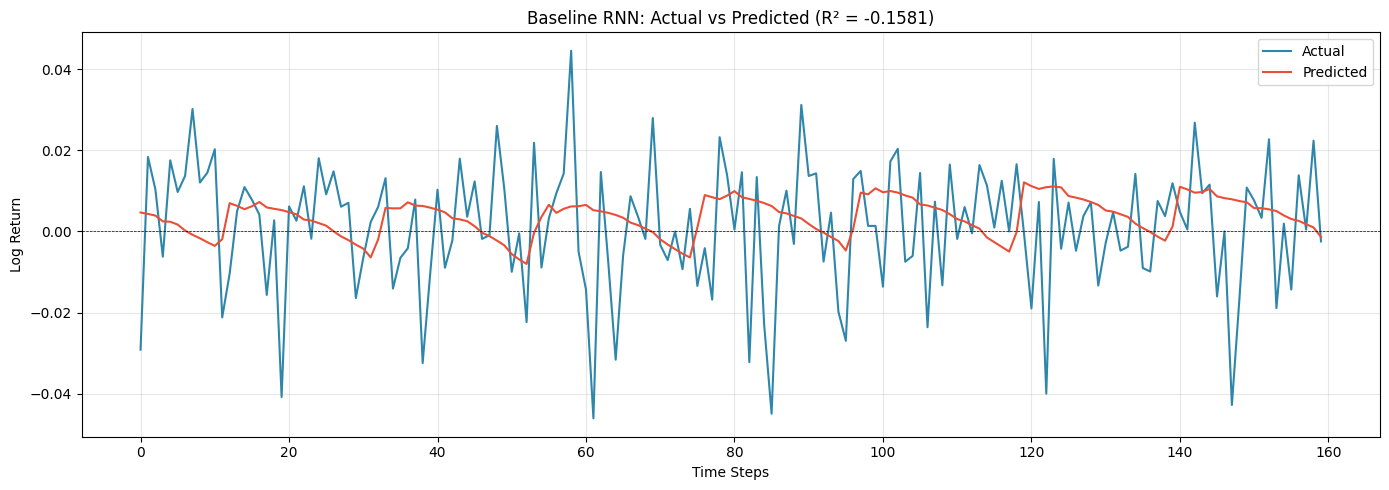

In [54]:
fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(range(len(y_true)), y_true, label='Actual', color='#2E86AB', linewidth=1.5)
ax.plot(range(len(y_pred)), y_pred, label='Predicted', color='#E94F37', linewidth=1.5)
ax.set_xlabel('Time Steps')
ax.set_ylabel('Log Return')
ax.set_title(f'Baseline RNN: Actual vs Predicted (R² = {r2:.4f})')
ax.legend()
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='black', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

## RNN with Attention Mechanism

Attention allows the model to focus on specific time steps that are most relevant for prediction, rather than relying solely on the final hidden state.

In [49]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Layer, Dropout, Multiply, Lambda
import tensorflow as tf


class AttentionLayer(Layer):
    
    def __init__(self, return_attention=False, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)
        self.return_attention = return_attention
    
    def build(self, input_shape):
        self.W = self.add_weight(
            name='attention_weight',
            shape=(input_shape[-1], input_shape[-1]),
            initializer='glorot_uniform',
            trainable=True
        )
        self.b = self.add_weight(
            name='attention_bias',
            shape=(input_shape[-1],),
            initializer='zeros',
            trainable=True
        )
        self.u = self.add_weight(
            name='attention_context',
            shape=(input_shape[-1],),
            initializer='glorot_uniform',
            trainable=True
        )
        super(AttentionLayer, self).build(input_shape)
    
    def call(self, inputs):
        score = tf.nn.tanh(tf.matmul(inputs, self.W) + self.b)
        attention_weights = tf.nn.softmax(tf.tensordot(score, self.u, axes=1), axis=1)
        attention_weights = tf.expand_dims(attention_weights, -1)
        context_vector = tf.reduce_sum(inputs * attention_weights, axis=1)
        
        if self.return_attention:
            return attention_weights
        return context_vector
    
    def get_config(self):
        config = super(AttentionLayer, self).get_config()
        config.update({'return_attention': self.return_attention})
        return config

### Build RNN with Attention Model

In [50]:
def build_rnn_attention_model(seq_length, n_features, rnn_units=128, dropout_rate=0.2):
    
    inputs = Input(shape=(seq_length, n_features))
    
    rnn_out = SimpleRNN(
        units=rnn_units,
        activation='tanh',
        return_sequences=True,
        recurrent_dropout=dropout_rate
    )(inputs)
    
    context_vector = AttentionLayer(return_attention=False)(rnn_out)
    
    x = Dropout(dropout_rate)(context_vector)
    
    outputs = Dense(1)(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    
    return model


def build_attention_extractor(seq_length, n_features, rnn_units=128, dropout_rate=0.2):
    
    inputs = Input(shape=(seq_length, n_features))
    
    rnn_out = SimpleRNN(
        units=rnn_units,
        activation='tanh',
        return_sequences=True,
        recurrent_dropout=dropout_rate
    )(inputs)
    
    attention_weights = AttentionLayer(return_attention=True)(rnn_out)
    
    model = Model(inputs=inputs, outputs=attention_weights)
    
    return model


rnn_attention_model = build_rnn_attention_model(
    seq_length=X_train_seq.shape[1],
    n_features=X_train_seq.shape[2],
    rnn_units=128,
    dropout_rate=0.2
)

rnn_attention_model.compile(
    optimizer=Adam(learning_rate=5e-4),
    loss='mse'
)

rnn_attention_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 30, 31)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 30, 128)        │        20,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_layer_1               │ (None, 128)            │        16,640 │
│ (AttentionLayer)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,249 (145.50 KB)

 Trainable params: 37,249 (145.50 KB)

 Non-trainable params: 0 (0.00 B)

### Train RNN with Attention

In [51]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

history_attention = rnn_attention_model.fit(
    X_train_seq,
    y_train_seq,
    validation_data=(X_val_seq, y_val_seq),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.0672 - val_loss: 0.8080 - learning_rate: 5.0000e-04
Epoch 2/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0446 - val_loss: 0.8490 - learning_rate: 5.0000e-04
Epoch 3/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0356 - val_loss: 0.8686 - learning_rate: 5.0000e-04
Epoch 4/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0352 - val_loss: 0.8227 - learning_rate: 5.0000e-04
Epoch 5/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0275 - val_loss: 0.8420 - learning_rate: 5.0000e-04
Epoch 6/50
115/127 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0024
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0099 - val_loss: 0.8136 - learning_rate: 5.0000e-04
Epoch 7/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0212 - val_loss: 0.8492 - learning_rate: 2.5000e-04
Epoch 8/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0089 - v

### Evaluate RNN with Attention

In [52]:
y_pred_attention_scaled = rnn_attention_model.predict(X_test_seq).flatten()

y_pred_attention = target_scaler.inverse_transform(y_pred_attention_scaled.reshape(-1, 1)).flatten()
y_true_attention = target_scaler.inverse_transform(y_test_seq.reshape(-1, 1)).flatten()

mse_att = mean_squared_error(y_true_attention, y_pred_attention)
rmse_att = np.sqrt(mse_att)
mae_att = mean_absolute_error(y_true_attention, y_pred_attention)
r2_att = r2_score(y_true_attention, y_pred_attention)

print(f"MSE:  {mse_att:.6f}")
print(f"RMSE: {rmse_att:.6f}")
print(f"MAE:  {mae_att:.6f}")
print(f"R²:   {r2_att:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MSE:  0.000270
RMSE: 0.016417
MAE:  0.012220
R²:   -0.1137


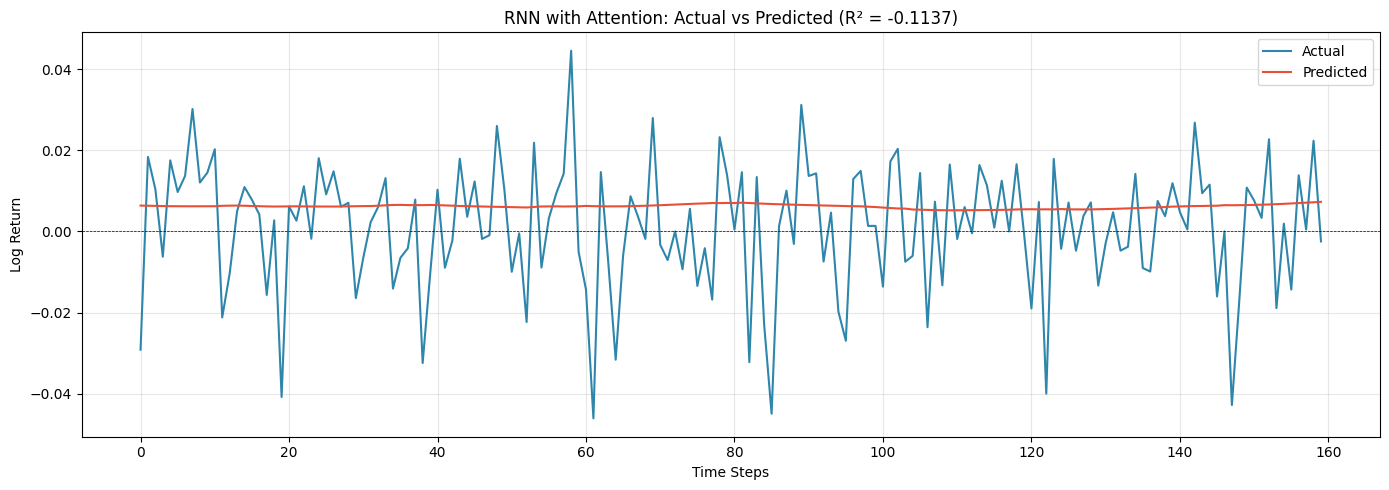

In [55]:
fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(range(len(y_true_attention)), y_true_attention, label='Actual', color='#2E86AB', linewidth=1.5)
ax.plot(range(len(y_pred_attention)), y_pred_attention, label='Predicted', color='#E94F37', linewidth=1.5)
ax.set_xlabel('Time Steps')
ax.set_ylabel('Log Return')
ax.set_title(f'RNN with Attention: Actual vs Predicted (R² = {r2_att:.4f})')
ax.legend()
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='black', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

## RNN with Attention and Skip Connections

In [56]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Layer, Dropout, Add, LayerNormalization, Concatenate
import tensorflow as tf


class AttentionLayer(Layer):
    
    def __init__(self, return_attention=False, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)
        self.return_attention = return_attention
    
    def build(self, input_shape):
        self.W = self.add_weight(
            name='attention_weight',
            shape=(input_shape[-1], input_shape[-1]),
            initializer='glorot_uniform',
            trainable=True
        )
        self.b = self.add_weight(
            name='attention_bias',
            shape=(input_shape[-1],),
            initializer='zeros',
            trainable=True
        )
        self.u = self.add_weight(
            name='attention_context',
            shape=(input_shape[-1],),
            initializer='glorot_uniform',
            trainable=True
        )
        super(AttentionLayer, self).build(input_shape)
    
    def call(self, inputs):
        score = tf.nn.tanh(tf.matmul(inputs, self.W) + self.b)
        attention_weights = tf.nn.softmax(tf.tensordot(score, self.u, axes=1), axis=1)
        attention_weights = tf.expand_dims(attention_weights, -1)
        context_vector = tf.reduce_sum(inputs * attention_weights, axis=1)
        
        if self.return_attention:
            return attention_weights
        return context_vector
    
    def get_config(self):
        config = super(AttentionLayer, self).get_config()
        config.update({'return_attention': self.return_attention})
        return config

### Build Model with Skip Connections

In [ ]:
from tensorflow.keras.layers import Concatenate, Multiply, Lambda
from tensorflow.keras.regularizers import l2

def build_rnn_attention_skip_model(seq_length, n_features, rnn_units=64, dropout_rate=0.3):
    
    inputs = Input(shape=(seq_length, n_features))
    
    # Simplified Architecture: Removed input projection skip connection
    
    # L2 regularization for RNN layer to prevent overfitting
    rnn_out = SimpleRNN(
        units=rnn_units,
        activation='tanh',
        return_sequences=True,
        recurrent_dropout=dropout_rate,
        kernel_regularizer=l2(1e-4),
        recurrent_regularizer=l2(1e-4)
    )(inputs)
    
    # Attention mechanism
    context_vector = AttentionLayer(return_attention=False)(rnn_out)
    
    # Last hidden state for residual connection
    last_hidden = rnn_out[:, -1, :]
    
    # Gated Residual Connection
    # Learn how much of the residual (last_hidden) to keep vs the new context
    gate_input = Concatenate()([context_vector, last_hidden])
    gate = Dense(rnn_units, activation='sigmoid')(gate_input)
    
    # Apply gate: (1 - gate) * context + gate * last_hidden
    # Using 1-gate for context allows the model to choose between attention context and raw hidden state
    gated_context = Multiply()([context_vector, Lambda(lambda x: 1.0 - x)(gate)])
    gated_residual = Multiply()([last_hidden, gate])
    
    combined = Add()([gated_context, gated_residual])
    
    skip_connection_output = LayerNormalization()(combined)
    
    x = Dropout(dropout_rate)(skip_connection_output)
    
    # Reduced Dense hidden layer
    x = Dense(32, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    
    outputs = Dense(1)(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    
    return model


rnn_attention_skip_model = build_rnn_attention_skip_model(
    seq_length=X_train_seq.shape[1],
    n_features=X_train_seq.shape[2],
    rnn_units=64, # Reduced from 128
    dropout_rate=0.3 # Increased from 0.2
)

rnn_attention_skip_model.compile(
    optimizer=Adam(learning_rate=1e-4), # Reduced from 5e-4
    loss='mse'
)

rnn_attention_skip_model.summary()



### Train Model

In [58]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

history_skip = rnn_attention_skip_model.fit(
    X_train_seq,
    y_train_seq,
    validation_data=(X_val_seq, y_val_seq),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.5335 - val_loss: 0.8932 - learning_rate: 5.0000e-04
Epoch 2/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1444 - val_loss: 0.8064 - learning_rate: 5.0000e-04
Epoch 3/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0498 - val_loss: 0.7952 - learning_rate: 5.0000e-04
Epoch 4/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0247 - val_loss: 0.7961 - learning_rate: 5.0000e-04
Epoch 5/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0181 - val_loss: 0.7949 - learning_rate: 5.0000e-04
Epoch 6/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0062 - val_loss: 0.7925 - learning_rate: 5.0000e-04
Epoch 7/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0054 - val_loss: 0.7884 - learning_rate: 5.0000e-04
Epoch 8/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.9993 - val_loss: 0.7911 - learning_rate: 5.0000e-04
Epoch 9/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0051 - val_loss: 0.7887 - 

### Evaluate Model

In [59]:
y_pred_skip_scaled = rnn_attention_skip_model.predict(X_test_seq).flatten()

y_pred_skip = target_scaler.inverse_transform(y_pred_skip_scaled.reshape(-1, 1)).flatten()
y_true_skip = target_scaler.inverse_transform(y_test_seq.reshape(-1, 1)).flatten()

mse_skip = mean_squared_error(y_true_skip, y_pred_skip)
rmse_skip = np.sqrt(mse_skip)
mae_skip = mean_absolute_error(y_true_skip, y_pred_skip)
r2_skip = r2_score(y_true_skip, y_pred_skip)

print(f"MSE:  {mse_skip:.6f}")
print(f"RMSE: {rmse_skip:.6f}")
print(f"MAE:  {mae_skip:.6f}")
print(f"R²:   {r2_skip:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
MSE:  0.000384
RMSE: 0.019603
MAE:  0.016629
R²:   -0.5878


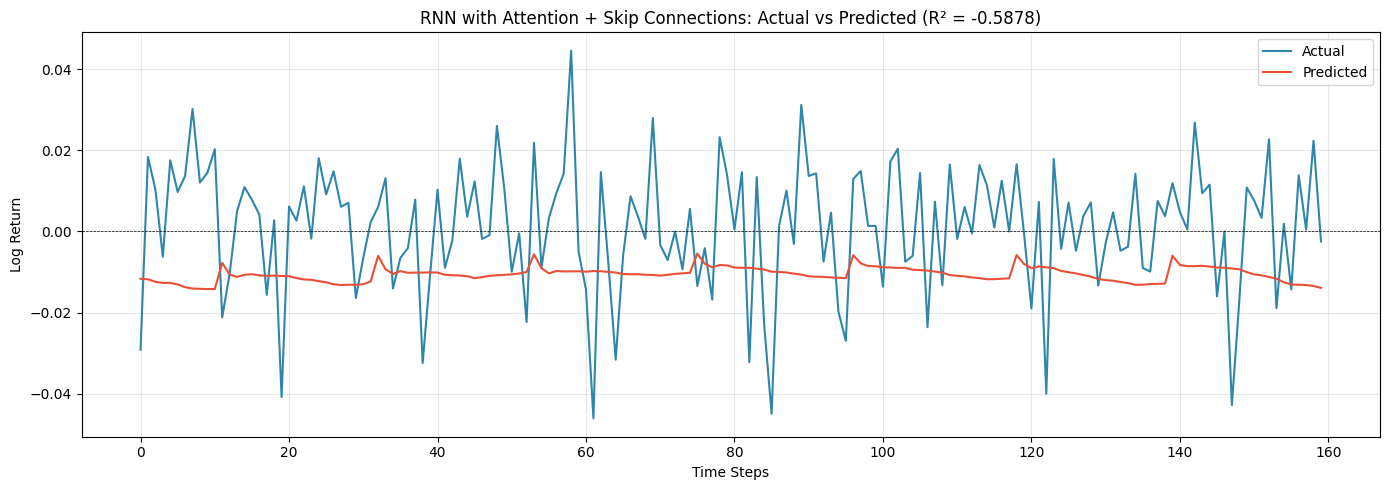

In [60]:
fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(range(len(y_true_skip)), y_true_skip, label='Actual', color='#2E86AB', linewidth=1.5)
ax.plot(range(len(y_pred_skip)), y_pred_skip, label='Predicted', color='#E94F37', linewidth=1.5)
ax.set_xlabel('Time Steps')
ax.set_ylabel('Log Return')
ax.set_title(f'RNN with Attention + Skip Connections: Actual vs Predicted (R² = {r2_skip:.4f})')
ax.legend()
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='black', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

                 Model      MSE     RMSE      MAE        R²
          Baseline RNN 0.000280 0.016741 0.012637 -0.158114
       RNN + Attention 0.000270 0.016417 0.012220 -0.113662
RNN + Attention + Skip 0.000384 0.019603 0.016629 -0.587823


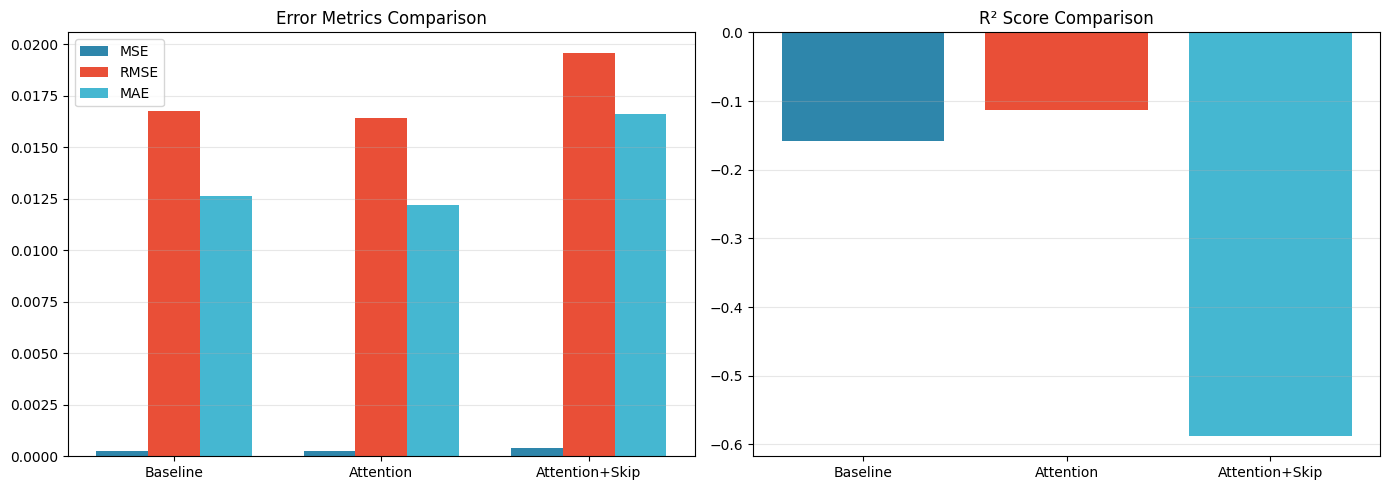

In [61]:
comparison_df = pd.DataFrame({
    'Model': ['Baseline RNN', 'RNN + Attention', 'RNN + Attention + Skip'],
    'MSE': [mse, mse_att, mse_skip],
    'RMSE': [rmse, rmse_att, rmse_skip],
    'MAE': [mae, mae_att, mae_skip],
    'R²': [r2, r2_att, r2_skip]
})

print(comparison_df.to_string(index=False))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

x = np.arange(3)
width = 0.25

axes[0].bar(x - width, [mse, mse_att, mse_skip], width, label='MSE', color='#2E86AB')
axes[0].bar(x, [rmse, rmse_att, rmse_skip], width, label='RMSE', color='#E94F37')
axes[0].bar(x + width, [mae, mae_att, mae_skip], width, label='MAE', color='#45B7D1')
axes[0].set_xticks(x)
axes[0].set_xticklabels(['Baseline', 'Attention', 'Attention+Skip'])
axes[0].set_title('Error Metrics Comparison')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].bar(['Baseline', 'Attention', 'Attention+Skip'], [r2, r2_att, r2_skip], color=['#2E86AB', '#E94F37', '#45B7D1'])
axes[1].set_title('R² Score Comparison')
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=0.5)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()